In [167]:
# Import standard libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
sns.set_context('talk', font_scale = 1.05)

### Load data

In [168]:
df = pd.read_csv("C:\\Users\\juhic\\OneDrive\\Desktop\\DubsTech Datathon\\data.csv")
df['collection_week'] = pd.to_datetime(df['collection_week'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742253 entries, 0 to 742252
Columns: 128 entries, hospital_pk to total_staffed_pediatric_icu_beds_7_day_sum
dtypes: bool(2), datetime64[ns](1), float64(87), int64(29), object(9)
memory usage: 714.9+ MB


### Load required columns (sum only)

In [169]:
df2 = pd.read_excel("eda.xlsx", sheet_name = "columns")
df3 = pd.read_excel("eda.xlsx", sheet_name = "base_columns")

columns = list(df3['Name']) + list(df2['sum_columns'])
df = df[columns]

### Handle nulls & -9999 data records

In [170]:
df.fillna(0, inplace = True)
df.replace(to_replace = -999999, value = 2, inplace = True)

### Group by at given granularity

#### 1. State

In [171]:
# drop select base columns
drop_cols = ['hospital_pk','ccn','hospital_name','address','city','zip','hospital_subtype','fips_code',
             'is_metro_micro','geocoded_hospital_address','hhs_ids','is_corrected']
df_temp = df.drop(columns = drop_cols)

# group at state-week
df_state = df_temp.groupby(by = ['collection_week','state'], as_index = False).sum()

# sort dataframe at week level
df_state.sort_values(['state', 'collection_week'], ascending=[True, True], inplace=True)
df_state.reset_index(drop = True, inplace = True)
df_state.head()

,collection_week,state,total_beds_7_day_sum,all_adult_hospital_beds_7_day_sum,all_adult_hospital_inpatient_beds_7_day_sum,inpatient_beds_used_7_day_sum,all_adult_hospital_inpatient_bed_occupied_7_day_sum,inpatient_beds_used_covid_7_day_sum,total_adult_patients_hospitalized_confirmed_and_suspected_covid_7_day_sum,total_adult_patients_hospitalized_confirmed_covid_7_day_sum,...,previous_day_admission_pediatric_covid_confirmed_7_day_sum,previous_day_total_ED_visits_7_day_sum,previous_day_covid_ED_visits_7_day_sum,previous_day_admission_influenza_confirmed_7_day_sum,previous_week_personnel_covid_vaccinated_doses_administered_7_day,total_personnel_covid_vaccinated_doses_none_7_day,total_personnel_covid_vaccinated_doses_one_7_day,total_personnel_covid_vaccinated_doses_all_7_day,previous_week_patients_covid_vaccinated_doses_one_7_day,previous_week_patients_covid_vaccinated_doses_all_7_day
0,2020-03-20,AK,324.0,0.0,0.0,72.0,0.0,9.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2020-03-27,AK,1783.0,0.0,0.0,586.0,0.0,13.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2020-04-03,AK,9304.0,0.0,0.0,3486.0,0.0,24.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2020-04-10,AK,8667.0,0.0,0.0,2676.0,0.0,58.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2020-04-17,AK,7031.0,0.0,0.0,1840.0,0.0,167.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### 2. City

In [172]:
# drop records where city = 0
df_temp = df.loc[df['city']!=0]
df_temp['city'] = df_temp['city'].str.title()

# drop select base columns
drop_cols = ['hospital_pk','ccn','hospital_name','address','zip','hospital_subtype','fips_code',
             'is_metro_micro','geocoded_hospital_address','hhs_ids','is_corrected']
df_temp = df_temp.drop(columns = drop_cols)

# group at city-state-week
df_city = df_temp.groupby(by = ['collection_week','state','city'], as_index = False).sum()

# sort dataframe at week level
df_city.sort_values(['state','city','collection_week'], ascending=[True, True, True], inplace=True)
df_city.reset_index(drop = True, inplace = True)
df_city.head()

,collection_week,state,city,total_beds_7_day_sum,all_adult_hospital_beds_7_day_sum,all_adult_hospital_inpatient_beds_7_day_sum,inpatient_beds_used_7_day_sum,all_adult_hospital_inpatient_bed_occupied_7_day_sum,inpatient_beds_used_covid_7_day_sum,total_adult_patients_hospitalized_confirmed_and_suspected_covid_7_day_sum,...,previous_day_admission_pediatric_covid_confirmed_7_day_sum,previous_day_total_ED_visits_7_day_sum,previous_day_covid_ED_visits_7_day_sum,previous_day_admission_influenza_confirmed_7_day_sum,previous_week_personnel_covid_vaccinated_doses_administered_7_day,total_personnel_covid_vaccinated_doses_none_7_day,total_personnel_covid_vaccinated_doses_one_7_day,total_personnel_covid_vaccinated_doses_all_7_day,previous_week_patients_covid_vaccinated_doses_one_7_day,previous_week_patients_covid_vaccinated_doses_all_7_day
0,2020-03-27,AK,Anchorage,766.0,0.0,0.0,331.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2020-04-03,AK,Anchorage,4726.0,0.0,0.0,2234.0,0.0,15.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2020-04-10,AK,Anchorage,3792.0,0.0,0.0,1491.0,0.0,56.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2020-04-17,AK,Anchorage,2944.0,0.0,0.0,818.0,0.0,111.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2020-04-24,AK,Anchorage,3811.0,0.0,0.0,1365.0,0.0,147.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 3. Hospital Type

### 4. Hospital Key

## State Base Model (Sum) 

In [173]:
# set variables
xcovariates = 'state'
xfeatures = ['total_adult_patients_hospitalized_confirmed_and_suspected_covid_7_day_sum',
            'staffed_adult_icu_bed_occupancy_7_day_sum']
y = 'inpatient_beds_used_covid_7_day_sum'

In [115]:
# check stationarity of individual time-series

from statsmodels.tsa.stattools import adfuller
ad_fuller1 = adfuller(df_state['total_adult_patients_hospitalized_confirmed_and_suspected_covid_7_day_sum'])
print('total_adult_patients_hospitalized_confirmed_and_suspected_covid_7_day_sum')
print(f'ADF Test statistic: {ad_fuller1[0]}')
print(f'p-value: {ad_fuller1[1]}')

ad_fuller2 = adfuller(df_state['staffed_adult_icu_bed_occupancy_7_day_sum'])
print('\nstaffed_adult_icu_bed_occupancy_7_day_sum')
print(f'ADF Test statistic: {ad_fuller2[0]}')
print(f'p-value: {ad_fuller2[1]}')

total_adult_patients_hospitalized_confirmed_and_suspected_covid_7_day_sum
ADF Test statistic: -8.433677588274751
p-value: 1.841058978500534e-13

staffed_adult_icu_bed_occupancy_7_day_sum
ADF Test statistic: -6.157912472746862
p-value: 7.29232718315445e-08


In [126]:
#perform Granger-Causality test

from statsmodels.tsa.stattools import grangercausalitytests
c1 = 'inpatient_beds_used_covid_7_day_sum'
c2 = 'total_adult_patients_hospitalized_confirmed_and_suspected_covid_7_day_sum'
c3 = 'staffed_adult_icu_bed_occupancy_7_day_sum'

print('------------c2 causes c1--------------------')
g2 = grangercausalitytests(df_state[[c1, c2]], 12)

print('\n----------------c3 causes c1---------------')
g3 = grangercausalitytests(df_state[[c1, c3]], 12)

------------c2 causes c1--------------------

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=61.1931 , p=0.0000  , df_denom=8577, df_num=1
ssr based chi2 test:   chi2=61.2145 , p=0.0000  , df=1
likelihood ratio test: chi2=60.9972 , p=0.0000  , df=1
parameter F test:         F=61.1931 , p=0.0000  , df_denom=8577, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=7.3093  , p=0.0007  , df_denom=8574, df_num=2
ssr based chi2 test:   chi2=14.6271 , p=0.0007  , df=2
likelihood ratio test: chi2=14.6146 , p=0.0007  , df=2
parameter F test:         F=7.3093  , p=0.0007  , df_denom=8574, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=8.8249  , p=0.0000  , df_denom=8571, df_num=3
ssr based chi2 test:   chi2=26.4962 , p=0.0000  , df=3
likelihood ratio test: chi2=26.4554 , p=0.0000  , df=3
parameter F test:         F=8.8249  , p=0.0000  , df_denom=8571, df_num=3

Granger Causality
number of lags (no zero)

### Train-Test Split (last 12 weeks)

In [174]:
cols = ['state',
        'collection_week',
        'total_adult_patients_hospitalized_confirmed_and_suspected_covid_7_day_sum', 
        'staffed_adult_icu_bed_occupancy_7_day_sum',
        'inpatient_beds_used_covid_7_day_sum']
df_state = df_state[cols]

In [175]:
df_state2 = df_state.loc[df_state['state'] == 'AK']
df_state2.drop(columns = 'state', inplace = True)

In [176]:
df_state2.set_index(keys = 'collection_week', inplace = True)
df_state2.head()

,total_adult_patients_hospitalized_confirmed_and_suspected_covid_7_day_sum,staffed_adult_icu_bed_occupancy_7_day_sum,inpatient_beds_used_covid_7_day_sum
collection_week,,,
2020-03-20,0.0,0.0,9.0
2020-03-27,0.0,0.0,13.0
2020-04-03,0.0,0.0,24.0
2020-04-10,0.0,0.0,58.0
2020-04-17,0.0,0.0,167.0


In [177]:
# set variables
x = ['total_adult_patients_hospitalized_confirmed_and_suspected_covid_7_day_sum', 'staffed_adult_icu_bed_occupancy_7_day_sum']
y = 'inpatient_beds_used_covid_7_day_sum'

In [179]:
# train-test split
train = df_state2[:-12]
test = df_state2[-12:]

In [180]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.varmax import VARMAX
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import grangercausalitytests, adfuller
from tqdm import tqdm_notebook
from itertools import product
import statsmodels.api as sm

In [188]:
model = VAR(train)
sorted_order = model.select_order(maxlags = 20)
print(sorted_order.summary())

 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0        25.68       25.75   1.428e+11       25.71
1        20.95      21.23*   1.260e+09       21.07
2       20.86*       21.35  1.149e+09*      21.06*
3        20.90       21.60   1.193e+09       21.18
4        20.94       21.85   1.249e+09       21.31
5        21.03       22.14   1.364e+09       21.48
6        21.11       22.43   1.478e+09       21.64
7        21.11       22.65   1.497e+09       21.74
8        21.18       22.92   1.608e+09       21.89
9        21.27       23.22   1.774e+09       22.06
10       21.31       23.47   1.859e+09       22.18
11       21.31       23.68   1.879e+09       22.27
12       21.35       23.93   1.990e+09       22.40
13       21.41       24.20   2.159e+09       22.55
14       21.41       24.40   2.187e+09       22.62
15       21.46       24.66   2.357e+09       22.76
16       21.33       24.74   2.

In [190]:
var_model = VARMAX(train, order = (2,0), enforce_stationarity = True)
fitted_model = var_model.fit(disp = False)
print(fitted_model.summary())

                                                                                                   Statespace Model Results                                                                                                  
Dep. Variable:     ['total_adult_patients_hospitalized_confirmed_and_suspected_covid_7_day_sum', 'staffed_adult_icu_bed_occupancy_7_day_sum', 'inpatient_beds_used_covid_7_day_sum']   No. Observations:                  140
Model:                                                                                                                                                                        VAR(2)   Log Likelihood               -2149.949
                                                                                                                                                                         + intercept   AIC                           4353.897
Date:                                                                                                           

In [191]:
n_forecast = 12
predict = fitted_model.get_prediction(start = len(train), end = len(train)+n_forecast-1)
predictions = predict.predicted_mean

### Vizualizing Forecasts vs Actuals

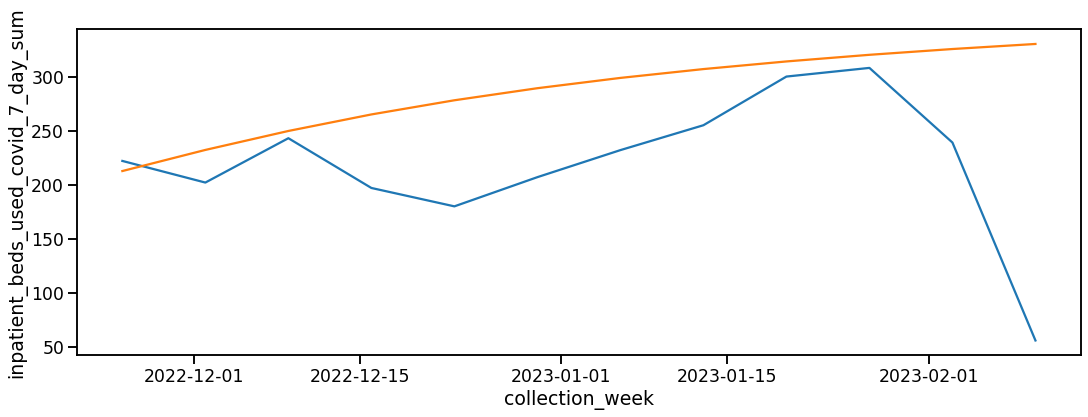

In [197]:
fig = plt.subplots(figsize = (18,6))
y = 'inpatient_beds_used_covid_7_day_sum'
sns.lineplot(x = test.index, y = y, data = test)
sns.lineplot(x = predictions.index, y = y, data = predictions)
plt.show()